In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pickle as pkl
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
x_train,y_train=pd.read_csv('../Data/processed_data/x_train.csv'), pd.read_csv('../Data/processed_data/y_train.csv')
x_test,y_test=pd.read_csv('../Data/processed_data/x_test.csv'), pd.read_csv('../Data/processed_data/y_test.csv')

In [4]:
def save_model(model):
    with open('best_model.pkl','wb') as model_obj:
        pkl.dump(model,model_obj)

In [5]:
def load_model():
    with open('best_model.pkl','rb') as model_obj:
        model=pkl.load(model_obj)
        return model

In [15]:
model={
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso': Lasso(),
    'Support Vector Machine': SVR(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boost Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'XGBoost Regressor': XGBRegressor()
}

In [16]:
params={
    'Linear Regression': {},
    'Ridge Regression':{'alpha':[6,7,8,9], 'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs']},
    'Lasso': {'alpha':[8,9,10]},
    'Support Vector Machine': {'C':[9000000,20000000],'kernel':['rbf']},
    'KNN Regressor': {'n_neighbors':[13,14,15],'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']},
    'Decision Tree':{'max_depth':[8,9,10], 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
                    'splitter':['best','random'], },
    'Random Forest Regressor':{'max_depth':[9,10,11], 'n_estimators':[300,400]},
    'Gradient Boost Regressor':{ 'max_depth':[3,4,5],'n_estimators':[150,200]},
    'AdaBoost Regressor':{'n_estimators':[300,400,500],'learning_rate':[0.3,0.4,0.5]},
    'XGBoost Regressor':{'learning_rate':[0.09,0.1,0.2], 'max_depth':[4,5,6],'n_estimators':[200,300]}
    
}

In [17]:
best_score=0.70
best_model=""
for models in model:
    reg_model=GridSearchCV(model[models], param_grid=params[models],scoring='neg_mean_squared_error',cv=10)
    reg_model.fit(x_train,y_train)
    reg_model=reg_model.best_estimator_
    
    train_pred=reg_model.predict(x_train)
    test_pred=reg_model.predict(x_test)
    
    print(str(models).center(125,'='))
    print('Model:',reg_model)
    print('Train score:',r2_score(y_train,train_pred))
    print('Test score:',r2_score(y_test,test_pred))
    
    val_score=r2_score(y_test,test_pred)
    
    if val_score> best_score:
        best_score=val_score
        best_model=reg_model
        print(f"Best Score: {best_score}")
        print(f"Best Model: {best_model}")
        save_model(best_model)

======================================================Linear Regression======================================================
Model: LinearRegression()
Train score: 0.7667228129796485
Test score: 0.7852734058249918
Best Score: 0.7852734058249918
Best Model: LinearRegression()
=======================================================Ridge Regression======================================================
Model: Ridge(alpha=6, solver='lsqr')
Train score: 0.7667208393853169
Test score: 0.7852872617722757
Best Score: 0.7852872617722757
Best Model: Ridge(alpha=6, solver='lsqr')
============================================================Lasso============================================================
Model: Lasso(alpha=10)
Train score: 0.7667228128811022
Test score: 0.7852736315226231
====================================================Support Vector Machine===================================================
Model: SVR(C=9000000)
Train score: 0.9738805993103252
Test score: 0.9722264358875886
B

In [18]:
models=load_model()
pred=models.predict(x_test)

In [19]:
r2_score(y_test,pred)

0.9731748206545501

In [21]:
np.sqrt(mean_squared_error(y_test,pred))

665690.649754992

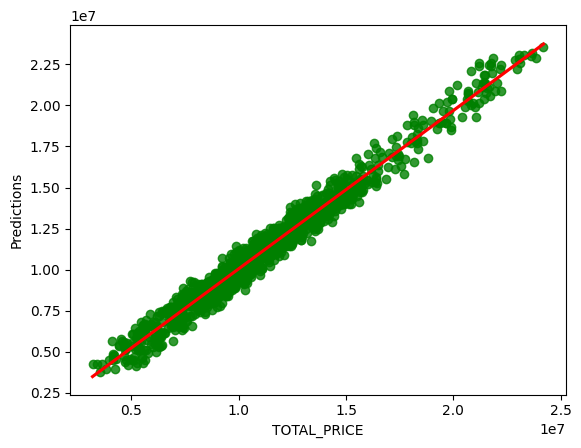

In [22]:
sns.regplot(x=y_test,y=pred,color='green',line_kws={'color':'red'})
plt.ylabel('Predictions')
plt.show()